In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
movies = pd.read_csv('2013_movies.csv')

# Challenge 1 - Plot Domestic Total Gross over Time

In [3]:
#change releasedate to datetime in order to track time
movies['ReleaseDate'] =  pd.to_datetime(movies['ReleaseDate'], format="%Y/%m/%d %H:%M:%S")

In [4]:
type(movies.loc[0,'ReleaseDate'])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
#converting values to millions of dollars for easier reading of data
movies['DomesticTotalGross'] = movies['DomesticTotalGross'].divide(1000000)
movies['Budget'] = movies['Budget'].divide(1000000)
movies

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130.0,424.668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200.0,409.013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150.0,400.738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76.0,368.061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225.0,291.045518,Zack Snyder,PG-13,143,2013-06-14
5,Gravity,100.0,274.092705,Alfonso Cuaron,PG-13,91,2013-10-04
6,Monsters University,NaN,268.492764,Dan Scanlon,G,107,2013-06-21
7,The Hobbit: The Desolation of Smaug,NaN,258.366855,Peter Jackson,PG-13,161,2013-12-13
8,Fast & Furious 6,160.0,238.679850,Justin Lin,PG-13,130,2013-05-24
9,Oz The Great and Powerful,215.0,234.911825,Sam Raimi,PG,127,2013-03-08


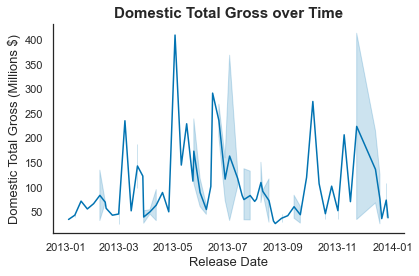

In [34]:
release = sns.lineplot(x='ReleaseDate', y='DomesticTotalGross', data=movies)
release.set_ylabel('Domestic Total Gross (Millions $)', fontsize=13)
release.set_xlabel('Release Date', fontsize=13)
release.axes.set_title('Domestic Total Gross over Time',
                 fontsize=15,
                 weight='bold')
sns.despine()
plt.tight_layout()

# Challenge 2 - Plot Runtime vs. Domestic Total Gross

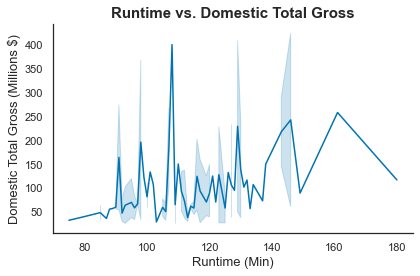

In [35]:
runtime = sns.lineplot(x='Runtime', y='DomesticTotalGross', data=movies)
runtime.set_ylabel('Domestic Total Gross (Millions $)', fontsize=13)
runtime.set_xlabel('Runtime (Min)', fontsize=13)
runtime.axes.set_title('Runtime vs. Domestic Total Gross',
                 fontsize=15,
                 weight='bold')
sns.despine()
plt.tight_layout()

# Challenge 3 - Group Data by Rating

In [11]:
movies.groupby(['Rating'])['Runtime', 'DomesticTotalGross'].mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Runtime,DomesticTotalGross
Rating,,
G,107.000000,268.492764
PG,99.933333,131.135716
PG-13,117.510638,111.449769
R,110.729730,69.892429


# Challenge 4 - Subplots

Text(0.5, 1.0, 'Line Chart')

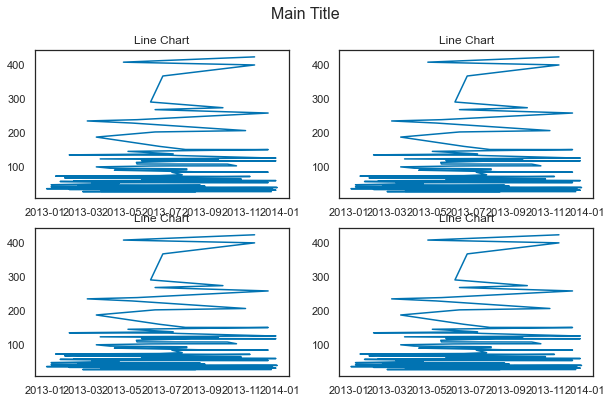

In [38]:
new_x = movies.ReleaseDate
new_y = movies.DomesticTotalGross

plt.figure(figsize=[10,6])

plt.suptitle('Main Title',fontsize = 16)

plt.subplot(2,2,1)
plt.plot(new_x,new_y)
plt.title('Line Chart')

plt.subplot(2,2,2)
plt.plot(new_x,new_y)
plt.title('Line Chart')

plt.subplot(2,2,3)
plt.plot(new_x,new_y)
plt.title('Line Chart')

plt.subplot(2,2,4)
plt.plot(new_x,new_y)
plt.title('Line Chart')

In [19]:
movies

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08


In [ ]:
sns